In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import tri
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
%matplotlib inline

from scipy.special import gamma
from scipy.interpolate import griddata

from matplotlib.colors import Normalize

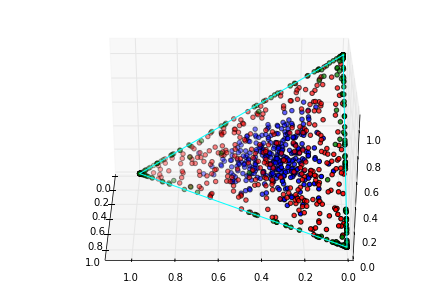

In [111]:
num_samples = 300
t = np.random.dirichlet((5, 5, 5), num_samples)
t1 = np.random.dirichlet((0.1, 0.1, 0.1), num_samples)
t2 = np.random.dirichlet((1, 1, 1), num_samples)

x = [0, 1, 0, 0]
y = [0, 0, 1, 0]
z = [1, 0, 0, 1]

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x,y,z, c='cyan')
ax.scatter(t[:,0], t[:,1], t[:,2], c='b')
ax.scatter(t1[:,0], t1[:,1], t1[:,2], c='g')
ax.scatter(t2[:,0], t2[:,1], t2[:,2], c='r')
ax.view_init(azim=180)
ax.set_xlim(1.1,0)
ax.set_ylim(0,1.1)
ax.set_zlim(0,1.1)
plt.show()

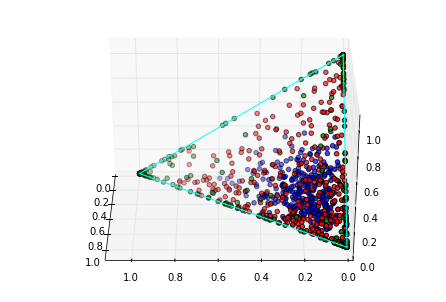

In [112]:
num_samples = 300
t = np.random.dirichlet((9, 3, 3), num_samples)
t1 = np.random.dirichlet((0.15, 0.075, 0.075), num_samples)
t2 = np.random.dirichlet((1.5, 0.75, 0.75), num_samples)

x = [0, 1, 0, 0]
y = [0, 0, 1, 0]
z = [1, 0, 0, 1]

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x,y,z, c='cyan')
ax.scatter(t[:,0], t[:,1], t[:,2], c='b')
ax.scatter(t1[:,0], t1[:,1], t1[:,2], c='g')
ax.scatter(t2[:,0], t2[:,1], t2[:,2], c='r')
ax.view_init(azim=180)
ax.set_xlim(1.1,0)
ax.set_ylim(0,1.1)
ax.set_zlim(0,1.1)
plt.show()

In [5]:
def dirichlet_pdf(x, alpha):
    B = np.sum(gamma(alpha))/gamma(np.sum(alpha))
    B = 1/B
    for i in xrange(alpha.shape[0]):
        B *= x[i] ** (alpha[i] - 1)
    return B

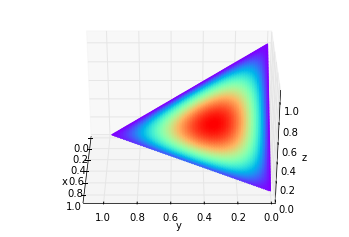

In [94]:
num_divisions = 100

# alpha = np.asarray([10.0, 10.0, 10.0])
# alpha = np.asarray([1.0, 1.0, 1.0])
alpha = np.asarray([2.0, 2.0, 2.0])

xg,yg = np.meshgrid(np.linspace(0,1,num=num_divisions),np.linspace(0,1,num=num_divisions))

t = xg+yg
xg[t >= 1] = None
yg[t >= 1] = None
zg = np.zeros(xg.shape)

probs = np.zeros(xg.shape)
for i in xrange(num_divisions):
    for j in xrange(num_divisions):
        if np.isnan(xg[i,j]) or np.isnan(yg[i,j]):
            zg[i,j] = None
        else:
            zg[i,j] = 1. - t[i,j]
            point = np.asarray([xg[i,j], yg[i,j], zg[i,j]])
            probs[i,j] = dirichlet_pdf(point, alpha)

color_dimension = probs # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='rainbow')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot_wireframe(X=xg, Y=yg, Z=zg, linewidth=1)
ax.plot_surface(X=xg, Y=yg, Z=zg,rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim=180)
ax.set_xlim(1.1,0)
ax.set_ylim(0,1.1)
ax.set_zlim(0,1.1)
plt.show()
